## 💻 Software Industry (India) 〽️ Analysis



In [3]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
# from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Salary_Dataset_with_Extra_Features.csv')
df.head()

Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   
3     3.8                SnapBizz Cloudtech  Android Developer   300000   
4     4.4            Appoids Tech Solutions  Android Developer   600000   

   Salaries Reported   Location Employment Status Job Roles  
0                  3  Bangalore         Full Time   Android  
1                  3  Bangalore         Full Time   Android  
2                  3  Bangalore         Full Time   Android  
3                  3  Bangalore         Full Time   Android  
4                  3  Bangalore         Full Time   Android

In [5]:
print(df.shape)


(22770, 8)


In [6]:
df.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

In [8]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows
# The dataset has no duplicate lines.


False

In [9]:
# ㅤDistribution of numeric columnsㅤ

missing_ratio = df.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / df.shape[0]
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')
numeric_info_df=df.describe()
numeric_info_df=pd.concat([missing_ratio_df,numeric_info_df],axis=0)
numeric_info_df

Rating        Salary  Salaries Reported
missing_ratio      0.000000  0.000000e+00           0.000000
count          22770.000000  2.277000e+04       22770.000000
mean               3.918213  6.953872e+05           1.855775
std                0.519675  8.843990e+05           6.823668
min                1.000000  2.112000e+03           1.000000
25%                3.700000  3.000000e+05           1.000000
50%                3.900000  5.000000e+05           1.000000
75%                4.200000  9.000000e+05           1.000000
max                5.000000  9.000000e+07         361.000000

In [10]:
# ㅤDistribution of categorical columnsㅤ
categorical_df=df.select_dtypes(exclude=['int64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values"]
values_list=[]
dic={}
for i in col_names:
    df1=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df1.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

Rating  Company Name  Job Title  Location  Employment Status  \
titles                                                                        
missing_ratio     0.0           0.0        0.0       0.0                0.0   
num_values       41.0       11261.0     1080.0      10.0                4.0   

               Job Roles  
titles                    
missing_ratio        0.0  
num_values          11.0

### Discover interesting things

#### Categorical clomuns

In [11]:
# ㅤCompany Nameㅤ
text = " ".join(company_name for company_name in df["Company Name"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

NameError: name 'WordCloud' is not defined

In [12]:
print(f'\n There are {len(df["Job Title"].unique())} job title enlisted here.\n')
countries_unique = np.unique(df['Job Title'])
countries_unique = pd.DataFrame(countries_unique , columns = ['Job Title'])
countries_unique


 There are 1080 job title enlisted here.



Job Title
0                                 "ORACLE DBA"
1                       .NET Developer, Python
2                       .NET/Android Developer
3             AEM Front End Developer - Intern
4           ASAP Software Development Engineer
...                                        ...
1075                  Web Developer Contractor
1076           Web Developer, Python Developer
1077  Web Developer/Android Developer - Intern
1078                  Xamarin Mobile Developer
1079                                oracle dba

[1080 rows x 1 columns]

In [13]:
text = " ".join(job_title for job_title in df["Job Title"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

NameError: name 'WordCloud' is not defined

In [15]:
print(f'\n There are {len(df["Location"].unique())} location enlisted here.\n')
location = np.unique(df['Location'])
location = pd.DataFrame(location, columns = ['Location'])
location.T


 There are 10 location enlisted here.



0        1          2       3       4        5  \
Location  Bangalore  Chennai  Hyderabad  Jaipur  Kerala  Kolkata   

                       6       7          8     9  
Location  Madhya Pradesh  Mumbai  New Delhi  Pune

Let's have a look on the location distribution :


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

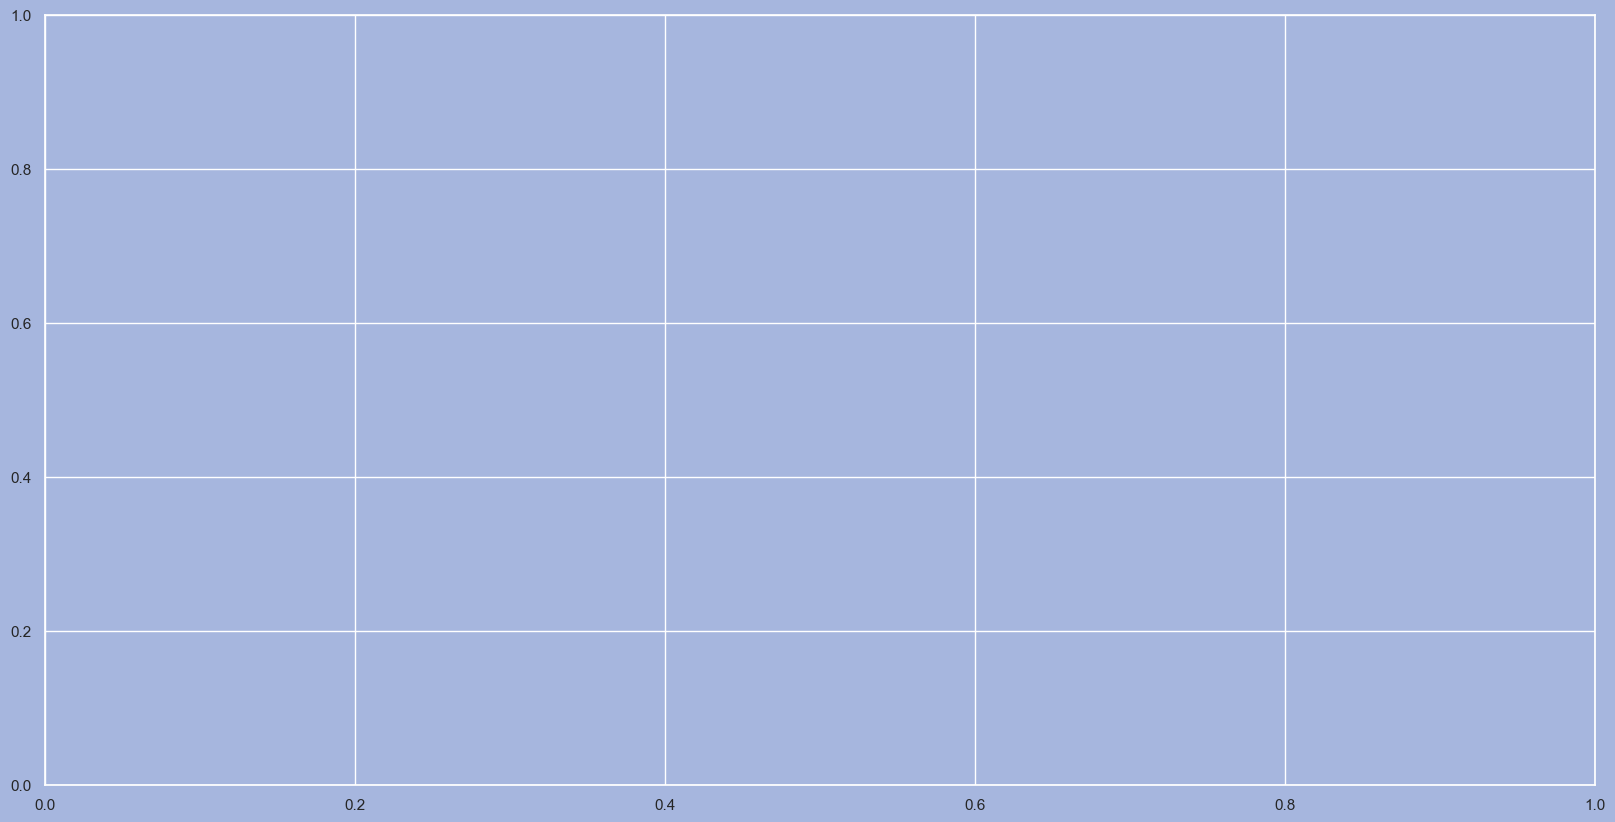

In [16]:
Location=df.groupby(["Location"])["Location"].count().sort_values()

print(f"Let's have a look on the location distribution :")
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(Location.values,Location.index,palette=palette, saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\nLocation distribution \n",fontsize=35)
p.axes.set_xlabel("Count",fontsize=25)
p.axes.set_ylabel("Location",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 1.5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [17]:
print(f'\n There are {len(df["Employment Status"].unique())} Employment Status enlisted here.\n')
Employment_Status = np.unique(df['Employment Status'])
Employment_Status = pd.DataFrame(Employment_Status , columns = ['Employment Status'])
Employment_Status


 There are 4 Employment Status enlisted here.



Employment Status
0        Contractor
1         Full Time
2            Intern
3           Trainee

In [18]:
employment_status=df["Employment Status"].value_counts().sort_values(ascending=False)
fig = px.pie(values=employment_status.values, 
             names=employment_status.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Employment status distribution',template='plotly_dark',
             width=750, height=500)
fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [19]:
print(f'\n There are {len(df["Job Roles"].unique())} job roles enlisted here.\n')
job_roles = np.unique(df['Job Roles'])
job_roles = pd.DataFrame(job_roles , columns = ['Job Roles'])
job_roles.T


 There are 11 job roles enlisted here.



0        1         2         3    4     5       6       7   \
Job Roles  Android  Backend  Database  Frontend  IOS  Java  Mobile  Python   

            8        9    10  
Job Roles  SDE  Testing  Web

In [20]:
job_roles = df['Job Roles'].value_counts()
fig = px.bar(y=job_roles.values, 
             x=job_roles.index, 
             color = job_roles.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=job_roles.values,
             title= 'Job roles distribution',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [21]:
Rating = df['Rating'].value_counts()
fig = px.bar(y=Rating.values, 
             x=Rating.index, 
             color = Rating.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Rating.values,
             title= 'Rating distribution',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [22]:
mean=pd.DataFrame(df.groupby("Job Roles")["Salary"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Salary"], 
             x=mean["Job Roles"], 
             color = mean["Job Roles"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Salary"],
             title= 'Job roles and average salary',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="Rupee - ₹",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [23]:
fig=px.box(data_frame=df,y="Salary",x="Job Roles",color="Job Roles",color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
          width=750, height=500)
fig.update_layout(template="plotly_dark")                        
fig.show()

In [24]:
data = df.loc[df["Salary"] != 90000000]

fig=px.box(data_frame=data,
           y="Salary",x="Job Roles",
           color="Job Roles",
           color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
           width=750, height=500)
fig.update_layout(template="plotly_dark")         
fig.show()

In [25]:
fig=px.violin(data,y="Location",x="Salary",color="Location",title="<b>Salary distribution in each Location",width=750, height=600)
fig.update_layout(template="plotly_dark")
fig.show()

In [26]:
fig=px.histogram(df,x="Job Roles",color="Employment Status",title="<b>Count of Employment Status on evry Job Roles",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=750, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [27]:
fig=px.violin(data,x="Rating",y="Job Roles",color="Job Roles",title="<b>Rating distribution in each Job Roles",width=750, height=600)
fig.update_layout(template="plotly_dark")
fig.show()

In [28]:
fig=px.scatter(data, y="Rating",x="Salary",color_discrete_sequence=["#B0E471"],
               title="<b>Relationship between Rating and Salary",
               width=750, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

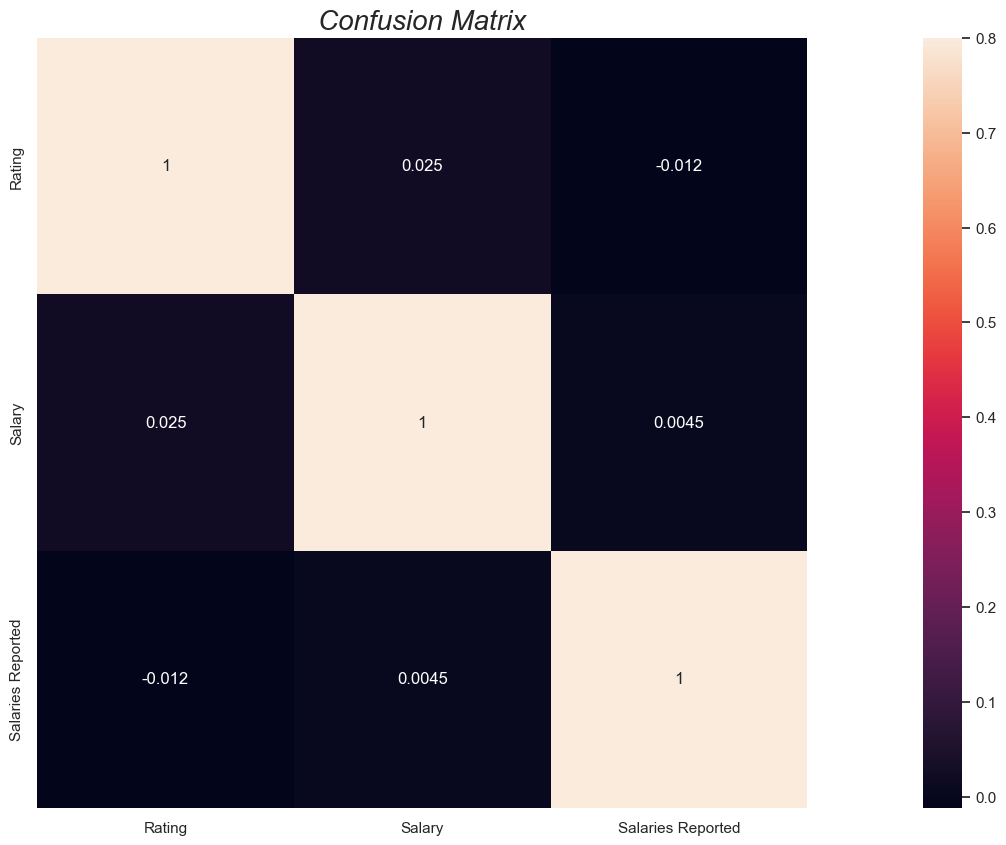

In [29]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
fig, ax = plt.subplots() 
fig.set_size_inches(30,10)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=20,fontstyle= 'oblique');